In [374]:
import pandas
import operator
import numpy as np
import matplotlib.pyplot as plt


file = 'dataset_diabetes/diabetic_data.csv'

with open(file, 'r') as csvfile:
    df = pandas.read_csv(csvfile, delimiter=',')

df.shape

(101766, 50)

In [375]:
df[:10]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [376]:
for v in df.columns.values:
    print(v)

encounter_id
patient_nbr
race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


В выборке имеются следующие столбцы:
    
1. **EncounterID** (номинальный) – уникальный номер визита
2. **Patient number** (номинальный) – уникальный номер пациента
3. **Race** (номинальный) – раса. В изначальных данных представлен в текстовом формате, имеет значения Caucasian (европиоидная), AfricanAmerican (африканская), Asian (азиатская), Hispanic (латино-американская), Other (другое)
4. **Gender** (номинальный) – пол пациента
5. **Age** (номинальный) - возраст пациента. Представлен в
формате диапазонов возраста – от 0 до 100 лет, с промежутками в 10 лет (0-10; 11-20; 21-30 и т.д.)
6. **Weight** (номинальный) – вес пациента в фунтах. Также как и возраст представлен в формате диапазонов.
7. **Admission type** (номинальный) – тип поступления в госпиталь. Имеет значения:
a. Emergency – скорая помощь
b. Urgent –срочный перевод из другого отделения
c. Elective – самостоятельное обращение
d. Newborn – новорожденный
e. Trauma Center – травматологический центр и еще три
значения, отражающие отсутствие записи о типе поступления
8. **Discharge disposition** (номинальный) – заключение по визиту, имеет 29 закодированных значений.
a. Discharged to home – выписан домой
b. Discharged/transferred to another short term hospital –
переведен в другой госпиталь
c. Discharged/transferred to SNF – переведен в отделение Skilled nursing facilities (отделение с уходом медсестѐр за больными)
23
d. Discharged/transferred to ICF – переведен в госпиталь ICF, специализирующийся на больных диабетом.
e. Discharged/transferred to another type of inpatient care institution – переведен в заведение по уходу за больными другого типа
f. Discharged/transferred to home with home health service – выписан домой с обязательным посещением врача на дому
g. Left AMA – покинул госпиталь по собственному желанию с отказом в проведении лечения/осмотра
h. Admitted as an inpatient to this hospital – оставлен в стационаре госпиталя
i. Expired – визит окончен
j. Hospice – переведен в хоспис
k. Discharged/transferred to a Critical Access Hospital
(CAH) – переведен в Critical Access Hospital, занимающийся тяжелыми случаями течения заболеваний. А также еще 18 значений, представляющих собой комбинацию выше перечисленных заключений визита.
9. **Time in hospital** (количественный) – количество дней, проведенных в госпитале
10. **Payer code** (номинальный) – 23 уникальных значения страховой компании.
11. **Medical specialty** (номинальный) – 84 уникальных значения отделений, в которое поступил больной. Например, кардиология, эндокринология, неврология и прочее.
12. **Number of lab procedures** (количественный) – количество проведенных лабораторных тестов для пациента
13. **Number of procedures** (количественный) – количество других процедур (не анализы), проведенных для пациента
14. **Number of medications** (количественный) – количество препаратов, принимаемых пациентом во время нахождения в госпитале 15. Number of outpatient visits (количественный) – количество
амбулаторных визитов данного пациента в период времени год до визита.
16. **Number of emergency visits** (количественный) – количество поступлений на скорой помощи в аналогичный период
17. **Number of inpatient visits** (количественный) – количество стационарных визитов в аналогичный период
24
18. **Diagnosis 1** (номинальный) – первичный диагноз. Закодировано по ICD9 – интернациональный стандарт классификации заболеваний.
001—139: инфекционные и паразитарные болезни
140—239: новообразования
240—279: болезни эндокринной системы, расстройства питания,
нарушения обмена веществ и иммунитета
280—289: болезни крови и кроветворных органов
290—319: психические расстройства
320—389: болезни нервной системы и органов чувств
390—459: болезни системы кровообращения
460—519: болезни органов дыхания
520—579: болезни органов пищеварения
580—629: болезни мочеполовой системы
630—679: осложнения беременности, родов и послеродового
периода
680—709: болезни кожи и подкожной клетчатки
710—739: болезни костно-мышечной системы и соединительной
ткани
740—759: врождѐнные аномалии (пороки развития)
760—779: отдельные состояния, возникающие в перинатальном
периоде
780—799: симптомы, признаки и неточно обозначенные
состояния
800—999: травмы и отравления18
19. **Diagnosis 2** (номинальный) – вторичный диагноз.
Закодировано по ICD9
20. **Diagnosis 3** (номинальный) – дополнительный вторичный
диагноз. Закодировано по ICD9
21. **Number of diagnoses** (количественный) – количество
диагнозов
22. **Glucose serum test result** (номинальный) – значения теста
на уровень глюкозы в крови. Значения: ―>200,‖ ―>300,‖ ―normal,‖ и ―none‖ если не измерялось
23. **A1c test result** (номинальный) – результаты теста на гликированный гемоглобин
18 URL: http://icd9.chrisendres.com/, дата обращения 16.04.2017 25
  
24. **Change of medications** (номинальный) – изменения в принимаемых лекарствах (было ли изменение, или нет)
25. **Diabetes medications** (номинальный) – прописаны ли лекарства от диабета
26. **24 features for medications** (номинальный) – факт принятия пациентом лекарства (24 столбца с наиболее распространенными лекарствами, принимаемые диабетиками)
27. **Readmitted** (номинальный) – показатель реадмиссии пациента. Вернулся в госпиталь после выписки с ухудшенным состоянием меньше чем через 30 дней (2), больше чем через 30 дней (1), не вернулся (0)

## Недостающие данные

В датасете есть данные, помеченные знаком вопроса, которые отсутствуют. Для каждого столбца посчитаем процент отсутствующих данных.

In [377]:
for column in df:
    if '?' in df[column].value_counts():
        ratio = df[column].value_counts()['?'] / sum(df[column].value_counts()) * 100
        print('{:22}{}'.format(column, ratio))

race                  2.2335554114340743
weight                96.85847925633315
payer_code            39.5574160328597
medical_specialty     49.08220820313268
diag_1                0.02063557573256294
diag_2                0.3517874339170253
diag_3                1.398305917497003


Так как для столбцов weight (вес), payer_code (значение страховой компании) и medical_specialty (название отделения, куда поступил больной) отсутствует более 40% данных, не будем учитывать эти столбцы.

Для остальных столбцов заменим '?' на самое частое значение в столбце.

In [378]:
df = df.drop('weight', 1)
df = df.drop('payer_code', 1)
df = df.drop('medical_specialty', 1)
df.shape

(101766, 47)

In [379]:
to_replace = ('race', 'diag_1', 'diag_2', 'diag_3')
for column in to_replace:
    df[column] = df[column].replace('?', max(df[column].value_counts().items(), 
                                             key=operator.itemgetter(1))[0])

Теперь у нас в выборке отсутствуют неизвестные значения.

## Бинаризация признаков

Приведем все признаки в бинарный формат: присвоим им значения 0 или 1.

Так как **раса** имеет 5 значений: Caucasian (европиоидная), AfricanAmerican (африканская), Asian (азиатская), Hispanic (латино-американская), Other (другое), заменим ее на 4 столбца.

То же самое сделаем с **гендером**.

Ячейки с айдишниками уберем, они нам не нужны.

In [380]:
df = df.drop('encounter_id', 1)
df = df.drop('patient_nbr', 1)

In [381]:
df = pandas.concat([df, pandas.get_dummies(df['race'])], axis = 1)
df = df.drop('race', 1)
df = df.drop('Other', 1)

df = pandas.concat([df, pandas.get_dummies(df['gender'])], axis = 1)
df = df.drop('gender', 1)
df = df.drop('Unknown/Invalid', 1)


Про **тип поступления** (admission_type_id) известно, что есть 5 типов поступления (скорая помощь, срочный перевод из другого отделения, самостоятельное обращение, новорожденный, травматологическое отделение) и еще 4 типа с отсутствием записи (Not Available, NULL, Not Mapped). Уберем эти четыре типа, остальные бинаризуем.

In [382]:
df['admission_type_id'] = df['admission_type_id'].replace({1: 'emergency_admission', 
                                                           2: 'urgent_admission', 
                                                           3: 'elective_admission',
                                                           4: 'newborn_admission', 
                                                           5: 'traumatology_admission', 
                                                           6: 'none', 7: 'none', 8: 'none'})
df = pandas.concat([df, pandas.get_dummies(df['admission_type_id'])], axis = 1)
df = df.drop('admission_type_id', 1)
df = df.drop('none', 1)

Для **количества дней**, проведенных в госпитале (time_in_hospital),  есть 14 значений (от 1 дня до 14 дней). Для них посмотрим, какие значения самые популярные и разобьем значения на интервалы.

In [383]:
df['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

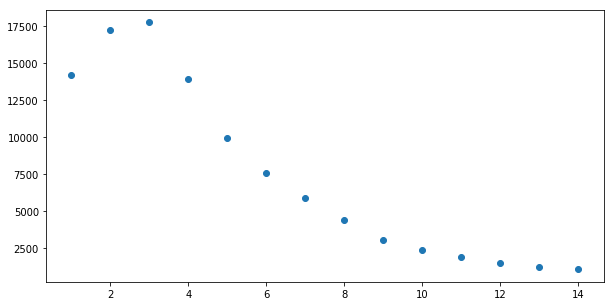

In [384]:
plt.figure(figsize=(10,5))
plt.scatter(df['time_in_hospital'].value_counts().keys(), df['time_in_hospital'].value_counts().values)
plt.show()

Видно, что самые частые значения – 1, 2, 3, 4 дня. Разобьем на интервалы вида <= 1 дня, <= 2 дней <= 3 дней, <= 4 дней, > 4 дней.

In [385]:
time_in_hospital = pandas.get_dummies(df['time_in_hospital'])
time_in_hospital[2] |= time_in_hospital[1]
time_in_hospital[3] |= time_in_hospital[2]
time_in_hospital[4] |= time_in_hospital[3]
for column in range(6, 15):
    time_in_hospital[5] |= time_in_hospital[column]
    time_in_hospital = time_in_hospital.drop(column, 1)
time_in_hospital.columns = ['days_geq_one', 'days_geq_two', 'days_geq_three', 'days_geq_four', 'days_geq_five']
df = pandas.concat([df, time_in_hospital], axis = 1)
df = df.drop('time_in_hospital', 1)
df[:10]

,age,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,elective_admission,emergency_admission,newborn_admission,traumatology_admission,urgent_admission,days_geq_one,days_geq_two,days_geq_three,days_geq_four,days_geq_five
0,[0-10),25,1,41,0,1,0,0,0,250.83,...,0,0,0,0,0,1,1,1,1,0
1,[10-20),1,7,59,0,18,0,0,0,276,...,0,1,0,0,0,0,0,1,1,0
2,[20-30),1,7,11,5,13,2,0,1,648,...,0,1,0,0,0,0,1,1,1,0
3,[30-40),1,7,44,1,16,0,0,0,8,...,0,1,0,0,0,0,1,1,1,0
4,[40-50),1,7,51,0,8,0,0,0,197,...,0,1,0,0,0,1,1,1,1,0
5,[50-60),1,2,31,6,16,0,0,0,414,...,0,0,0,0,1,0,0,1,1,0
6,[60-70),1,2,70,1,21,0,0,0,414,...,1,0,0,0,0,0,0,0,1,0
7,[70-80),1,7,73,0,12,0,0,0,428,...,0,1,0,0,0,0,0,0,0,1
8,[80-90),1,4,68,2,28,0,0,0,398,...,0,0,0,0,1,0,0,0,0,1
9,[90-100),3,4,33,3,18,0,0,0,434,...,1,0,0,0,0,0,0,0,0,1


**Возраст** тоже поделим на интервалы. Посмотрим на разброс по годам.

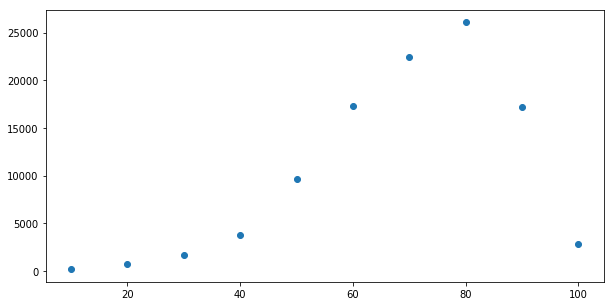

In [386]:
x = [int(k.split('-')[1].replace(')','')) for k in df['age'].value_counts().keys()]
y = df['age'].value_counts().values
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.show()

Можно разделить на несколько возрастных интервалов: <= 50, <= 60, <= 70, <= 80, <= 90, > 90.

In [387]:
age = pandas.get_dummies(df['age'])
age
for column in ('[0-10)', '[10-20)', '[20-30)', '[30-40)'):
    age['[40-50)'] |= age[column]
    age = age.drop(column, 1)
age['[50-60)'] |= age['[40-50)'] 
age['[60-70)'] |= age['[50-60)'] 
age['[70-80)'] |= age['[60-70)'] 
age['[80-90)'] |= age['[70-80)'] 
age.columns = ['age_less_50', 'age_less_60', 'age_less_70', 'age_less_80', 'age_less_90', 'age_more_90']
age['age_more_80'] = age['age_more_90'] | age['age_less_90']
age['age_more_70'] = age['age_more_80'] | age['age_less_80']
age['age_more_60'] = age['age_more_70'] | age['age_less_70']
age['age_more_50'] = age['age_more_60'] | age['age_less_60']
df = pandas.concat([df, age], axis=1)
df = df.drop('age', 1)

Количество не лабораторных процедур разобьем на интервалы >=1, >=2, >=3, >=4, >=5 >=6 процедур, так как они принимают значения от 0 до 6, причем больше всего значений ноль.

In [388]:
df['num_procedures'].value_counts()

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64

In [389]:
num_procedures = pandas.get_dummies(df['num_procedures'])
for column in range(5, -1, -1):
    num_procedures[column] |= num_procedures[column + 1]
num_procedures = num_procedures.drop(0, 1)
num_procedures.columns = ['num_procedures_geq_' + str(i) for i in range(1, 7)]
df = pandas.concat([df, num_procedures], axis=1)
#df = df.drop('num_procedures', 1)
df[:10]

,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,age_more_80,age_more_70,age_more_60,age_more_50,num_procedures_geq_1,num_procedures_geq_2,num_procedures_geq_3,num_procedures_geq_4,num_procedures_geq_5,num_procedures_geq_6
0,25,1,41,0,1,0,0,0,250.83,276,...,1,1,1,1,0,0,0,0,0,0
1,1,7,59,0,18,0,0,0,276,250.01,...,1,1,1,1,0,0,0,0,0,0
2,1,7,11,5,13,2,0,1,648,250,...,1,1,1,1,1,1,1,1,1,0
3,1,7,44,1,16,0,0,0,8,250.43,...,1,1,1,1,1,0,0,0,0,0
4,1,7,51,0,8,0,0,0,197,157,...,1,1,1,1,0,0,0,0,0,0
5,1,2,31,6,16,0,0,0,414,411,...,1,1,1,1,1,1,1,1,1,1
6,1,2,70,1,21,0,0,0,414,411,...,1,1,1,1,1,0,0,0,0,0
7,1,7,73,0,12,0,0,0,428,492,...,1,1,1,1,0,0,0,0,0,0
8,1,4,68,2,28,0,0,0,398,427,...,1,1,1,1,1,1,0,0,0,0
9,3,4,33,3,18,0,0,0,434,198,...,1,1,1,1,1,1,1,0,0,0


То же сделаем с **лабораторными процедурами**, но с более широкими интервалами. Разобьем примерно так: 1 процедура (так как это довольно частое значение), от 1 до 30 процедур, от 30 до 40, от 40 до 45, от 45 до 60 и более 60.

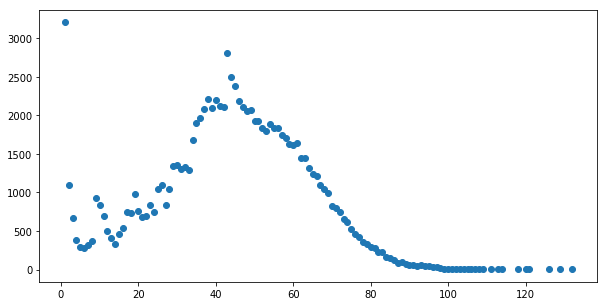

In [390]:
plt.figure(figsize=(10,5))
plt.scatter(df['num_lab_procedures'].value_counts().keys(), df['num_lab_procedures'].value_counts().values)
plt.show()

In [391]:
num_lab_procedures = pandas.get_dummies(df['num_lab_procedures'])
for column in range(2, 30):
    num_lab_procedures[30] |= num_lab_procedures[column]
    num_lab_procedures = num_lab_procedures.drop(column, 1)
for column in range(31, 40):
    num_lab_procedures[40] |= num_lab_procedures[column]
    num_lab_procedures = num_lab_procedures.drop(column, 1)
for column in range(41, 45):
    num_lab_procedures[45] |= num_lab_procedures[column]
    num_lab_procedures = num_lab_procedures.drop(column, 1)
for column in range(46, 60):
    num_lab_procedures[60] |= num_lab_procedures[column]
    num_lab_procedures = num_lab_procedures.drop(column, 1)
for column in (set(num_lab_procedures.columns) - {1, 30, 40, 45, 60, 132}):
    num_lab_procedures[132] |= num_lab_procedures[column]
    num_lab_procedures = num_lab_procedures.drop(column, 1)
num_lab_procedures.columns = ['num_lab_procedures' + str(i) for i in num_lab_procedures.columns]
df = pandas.concat([df, num_lab_procedures], axis=1)
df = df.drop('num_lab_procedures', 1)

Информация о том, **откуда прибыл пациент** (admission_source_id), имеет следующую расшифровку:

id  | desciption
------------- | -------------
1 | Physician Referral
2 | Clinic Referral
3 | HMO Referral
4 | Transfer from a hospital
5 | Transfer from a Skilled Nursing Facility (SNF)
6 | Transfer from another health care facility
7 | Emergency Room
8 | Court/Law Enforcement
9 | Not Available
10 | Transfer from critial access hospital
11 | Normal Delivery
13  | Sick Baby
14  | Extramural Birth
17 | NULL
20 | Not Mapped
22 | Transfer from hospital inpt/same fac reslt in a sep claim
25 | Transfer from Ambulatory Surgery Center


In [392]:
df['admission_source_id'].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

Уберем id без значения -- 9, 17, 20.

In [393]:
admission_source_id = pandas.get_dummies(df['admission_source_id'])
admission_source_id = admission_source_id.drop(9, 1)
admission_source_id = admission_source_id.drop(17, 1)
admission_source_id = admission_source_id.drop(20, 1)
admission_source_id.columns = ['admission_' + str(i) for i in admission_source_id.columns]
df = pandas.concat([df, admission_source_id], axis=1)
df = df.drop('admission_source_id', 1)

**Количество препаратов** разделим на большие интервалы.

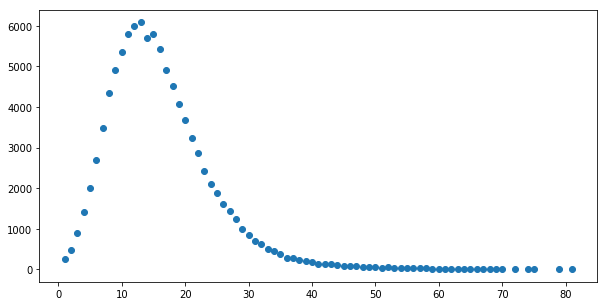

In [394]:
plt.figure(figsize=(10,5))
plt.scatter(df['num_medications'].value_counts().keys(), df['num_medications'].value_counts().values)
plt.show()

In [395]:
num_medications = pandas.get_dummies(df['num_medications'])
for column in range(1, 10):
    num_medications[10] |= num_medications[column]
    num_medications = num_medications.drop(column, 1)
for column in range(11, 15):
    num_medications[15] |= num_medications[column]
    num_medications = num_medications.drop(column, 1) 
for column in range(16, 20):
    num_medications[20] |= num_medications[column]
    num_medications = num_medications.drop(column, 1)   
for column in (set(num_medications.columns) - {10, 15, 20, 81}):
    num_medications[81] |= num_medications[column]
    num_medications = num_medications.drop(column, 1)
num_medications.columns = ['num_medications_' + str(i) for i in num_medications.columns]
df = pandas.concat([df, num_medications], axis=1)
df = df.drop('num_medications', 1)

In [396]:
number_outpatient = pandas.get_dummies(df['number_outpatient'])
for column in range(1, 10):
    number_outpatient[10] |= number_outpatient[column]
    number_outpatient = number_outpatient.drop(column, 1)
for column in range(11, 20):
    number_outpatient[20] |= number_outpatient[column]
    number_outpatient = number_outpatient.drop(column, 1)  
for column in range(21, 29):
    number_outpatient[29] |= number_outpatient[column]
    number_outpatient = number_outpatient.drop(column, 1)  
for column in range(33, 41):
    number_outpatient[42] |= number_outpatient[column]
    number_outpatient = number_outpatient.drop(column, 1)
number_outpatient = number_outpatient.drop(0, 1)
number_outpatient.columns = ['number_outpatient_' + str(i) for i in number_outpatient.columns]
df = pandas.concat([df, number_outpatient], axis=1)
df = df.drop('number_outpatient', 1)

In [397]:
number_emergency = pandas.get_dummies(df['number_emergency'])
for column in range(1, 10):
    if column in number_emergency.columns:
        number_emergency[10] |= number_emergency[column]
        number_emergency = number_emergency.drop(column, 1)
for column in range(11, 20):
    if column in number_emergency.columns:
        number_emergency[20] |= number_emergency[column]
        number_emergency = number_emergency.drop(column, 1)  
for column in range(21, 29):
    if column in number_emergency.columns:
        number_emergency[29] |= number_emergency[column]
        number_emergency = number_emergency.drop(column, 1)        
for column in (set(number_emergency.columns) - {0, 10, 20, 29, 76}):
    number_emergency[76] |= number_emergency[column]
    number_emergency = number_emergency.drop(column, 1)        
    
number_emergency = number_emergency.drop(0, 1)
number_emergency.columns = ['number_emergency_' + str(i) for i in number_emergency.columns]
df = pandas.concat([df, number_emergency], axis=1)
df = df.drop('number_emergency', 1)

In [398]:
number_inpatient = pandas.get_dummies(df['number_inpatient'])
for column in range(18, 0, -1):
    number_inpatient[column] |= number_inpatient[column + 1]   
for column in (set(number_inpatient.columns) - set(range(6))):
    number_inpatient[5] |= number_inpatient[column]
    number_inpatient = number_inpatient.drop(column, 1)
number_inpatient = number_inpatient.drop(0, 1)
number_inpatient.columns = ['number_inpatient_' + str(i) for i in number_inpatient.columns]
df = pandas.concat([df, number_inpatient], axis=1)
df = df.drop('number_inpatient', 1)

Поля с **диагнозами** закодированы по системе ICD9 – интернациональный стандарт классификации заболеваний.

001—139: инфекционные и паразитарные болезни

140—239: новообразования

240—279: болезни эндокринной системы, расстройства питания, нарушения обмена веществ и иммунитета

280—289: болезни крови и кроветворных органов

290—319: психические расстройства

320—389: болезни нервной системы и органов чувств

390—459: болезни системы кровообращения

460—519: болезни органов дыхания

520—579: болезни органов пищеварения

580—629: болезни мочеполовой системы

630—679: осложнения беременности, родов и послеродового периода

680—709: болезни кожи и подкожной клетчатки

710—739: болезни костно-мышечной системы и соединительной ткани

740—759: врождѐнные аномалии (пороки развития)

760—779: отдельные состояния, возникающие в перинатальном периоде

780—799: симптомы, признаки и неточно обозначенные состояния

800—999: травмы и отравления

У examide, citoglipton все ячейки имеют одно значение - 0, уберем его из признаков.

In [399]:
df = df.drop('examide', 1)
df = df.drop('citoglipton', 1)

In [400]:
intervals = [0, 140, 240, 280, 290, 320, 390, 460, 520, 580, 630, 680, 710, 740, 760, 780, 800, 1000]
labels = ['{0}-{1}'.format(intervals[i], intervals[i + 1]) for i in range(len(intervals) - 1)]

for k in {1, 2, 3}:
    diag = pandas.DataFrame(df['diag_' + str(k)])
    for i in range(100):
        diag = diag.replace('V{:02}'.format(i), i)
    for i in range(800, 999):
        diag = diag.replace('E{}'.format(i), i)
    diag = diag.astype(float)

    diag['diag_group'] = pandas.cut(diag['diag_' + str(k)], intervals, right=False, labels=labels)
    diag_group = pandas.get_dummies(diag['diag_group'])
    diag_group.columns = ['diag_' + str(k) + '_group_' + str(i) for i in diag_group.columns]
    df = pandas.concat([df, diag_group], axis=1)
    df = df.drop('diag_' + str(k), 1)

In [401]:
intervals = [1, 5, 8, 9, 17]
labels = ['{0}-{1}'.format(intervals[i], intervals[i + 1]) for i in range(len(intervals) - 1)]
number_diagnoses = pandas.DataFrame(df['number_diagnoses'])
number_diagnoses['number_diagnoses_interval'] = pandas.cut(number_diagnoses['number_diagnoses'], 
                                                           intervals, right=False, labels=labels)
number_diagnoses = pandas.get_dummies(number_diagnoses['number_diagnoses_interval'])
number_diagnoses.columns = ['number_diagnoses_' + str(i) for i in number_diagnoses.columns]
df = pandas.concat([df, number_diagnoses], axis=1)
df = df.drop('number_diagnoses', 1)

In [402]:
max_glu_serum = pandas.get_dummies(df['max_glu_serum'])
max_glu_serum = max_glu_serum.drop('None', 1)
max_glu_serum['>300'] |= max_glu_serum['>200'] 
max_glu_serum.columns = ['max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_norm']
df = pandas.concat([df, max_glu_serum], axis=1)
df = df.drop('max_glu_serum', 1)

In [403]:
A1Cresult = pandas.get_dummies(df['A1Cresult'])
A1Cresult = A1Cresult.drop('None', 1)
A1Cresult['>8'] |= A1Cresult['>7'] 
A1Cresult.columns = ['A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_norm']
df = pandas.concat([df, A1Cresult], axis=1)
df = df.drop('A1Cresult', 1)

In [404]:
for med in {'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
           'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin'}:
    medicine = pandas.get_dummies(df[med])
    medicine = medicine.drop('No', 1)
    medicine.columns = [med + '_down', med + '_steady', med +'_up']
    df = pandas.concat([df, medicine], axis=1)
    df = df.drop(med, 1)

In [405]:
tolazamide = pandas.get_dummies(df['tolazamide'])
tolazamide = tolazamide.drop('No', 1)
tolazamide
tolazamide.columns = ['tolazamide_steady', 'tolazamide_up']
df = pandas.concat([df, tolazamide], axis=1)
df = df.drop('tolazamide', 1)

In [406]:
for med in {'acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'change', 'diabetesMed', 'metformin-pioglitazone'}:
    medicine = pandas.get_dummies(df[med])
    medicine = medicine.drop('No', 1)
    medicine.columns = [med]
    df = pandas.concat([df, medicine], axis=1)
    df = df.drop(med, 1)

In [407]:
discharge_disposition_id = pandas.get_dummies(df['discharge_disposition_id'])
discharge_disposition_id.columns = ['discharge_disposition_id_' + str(i) for i in discharge_disposition_id.columns]
df = pandas.concat([df, discharge_disposition_id], axis=1)
df = df.drop('discharge_disposition_id', 1)

В исходной выборке целевой признак имеет 3 значения – пациент прибыл обратно менее, чем через 30 дней, более или не прибыл вообще. Заменим целевой признак на бинарные значения "прибыл обратно" и "не прибыл".

In [408]:
readmitted = pandas.get_dummies(df['readmitted'])
readmitted['>30'] |= readmitted['<30']
readmitted = readmitted.drop('NO', 1)
readmitted = readmitted.drop('<30', 1)
readmitted.columns = ['readmission']
df = pandas.concat([df, readmitted], axis=1)
df = df.drop('readmitted', 1)
df[:10]

,num_procedures,AfricanAmerican,Asian,Caucasian,Hispanic,Female,Male,elective_admission,emergency_admission,newborn_admission,...,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,readmission
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь все признаки имеют бинарные значения.

## Lazy Classification

80% возьмем за train выборку, остальное – за test. Разделим обучающую выборку на плюс и минус контексты.

In [473]:
train = df[34000:34800]
test = df[34800:35000]
train.shape

(800, 199)

In [474]:
answers = test['readmission']
test = test.drop('readmission', 1)
test.shape

(200, 198)

Посмотрим сначала на метрики на RandomForest:

In [484]:
from sklearn.ensemble import RandomForestClassifier

In [500]:
forest = RandomForestClassifier(n_estimators = 1000)
y = train['readmission']
train_ = train.drop('readmission', 1)
forest.fit(train_, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [501]:
my_answers = forest.predict(test)

In [502]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for a, b in list(zip(answers, my_answers)):
    if a and b:
        true_positive += 1
    elif a and not b:    
        false_negative += 1
    elif not a and b:
        false_positive += 1
    elif not a and not b:
        true_negative += 1
print('Accuracy: ', (true_positive + true_negative) / (true_positive + true_negative + 
                                                       false_positive + false_negative))
print('Precision: ', true_positive / (true_positive + false_positive))
print('Recall: ', true_positive / (true_positive + false_negative))

Accuracy:  0.715
Precision:  0.75
Recall:  0.46987951807228917


Теперь будем смотреть на пересечение описания объекта с плюс- и минус-контекстами и вложенность этого пересечения соответственно в минус- и плюс-контексты.

In [503]:
context_plus = train[train['readmission'] == 1]
context_plus.shape

(290, 199)

In [504]:
context_minus = train[train['readmission'] == 0]
context_minus.shape

(510, 199)

In [505]:
all_plus_sets = []
for index, row in context_plus.iterrows():
    all_plus_sets.append({column for column, value in row.items() if value == 1})

all_minus_sets = []
for index, row in context_minus.iterrows():
    all_minus_sets.append({column for column, value in row.items() if value == 1})

In [506]:
import time
start = time.time()
my_answers = []
count = 0
for ind, g in test.iterrows():
    count += 1
    g_start = time.time()
    g_set = {column for column, value in g.items() if value == 1}
    for g_plus_set in all_plus_sets:
        intersection = set.intersection(g_set, g_plus_set)
        plus_closure = [g_minus for g_minus in all_minus_sets if intersection.issubset(g_minus)]
    for g_minus_set in all_minus_sets:
        intersection = set.intersection(g_set, g_minus_set)
        minus_closure = [g_plus for g_plus in all_plus_sets if intersection.issubset(g_plus)]
        
    plus_aggr = 0
    for closure in plus_closure:
        plus_aggr += len(closure)
    minus_aggr = 0
    for closure in minus_closure:
        minus_aggr += len(closure)
        
    if plus_aggr <= minus_aggr:
        my_answers.append(1)
    elif plus_aggr > minus_aggr:
        my_answers.append(0)
#     print(count, time.time() - g_start)
print(time.time() - start)

8.39236307144165


In [507]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for a, b in list(zip(answers, my_answers)):
    if a and b:
        true_positive += 1
    elif a and not b:    
        false_negative += 1
    elif not a and b:
        false_positive += 1
    elif not a and not b:
        true_negative += 1
print('True Positive', true_positive)
print('True Negative', true_negative)
print('False Positive', false_positive)
print('False Negative', false_negative)
print('Accuracy: ', (true_positive + true_negative) / (true_positive + true_negative + 
                                                       false_positive + false_negative))
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
print('Precision: ', true_positive / (true_positive + false_positive))
print('Recall: ', true_positive / (true_positive + false_negative))
print('F-measure: ', 2 * (precision * recall) / (precision + recall))

True Positive 42
True Negative 90
False Positive 27
False Negative 41
Accuracy:  0.66
Precision:  0.6086956521739131
Recall:  0.5060240963855421
F-measure:  0.5526315789473684


А теперь будем искать вложение пересечения в том же контексте.

In [469]:
import time
start = time.time()
my_answers = []
count = 0
for ind, g in test.iterrows():
    count += 1
    g_start = time.time()
    g_set = {column for column, value in g.items() if value == 1}
    for g_plus_set in all_plus_sets:
        intersection = set.intersection(g_set, g_plus_set)
        plus_closure = [g_plus for g_plus in all_plus_sets if intersection.issubset(g_plus)]
    for g_minus_set in all_minus_sets:
        intersection = set.intersection(g_set, g_minus_set)
        minus_closure = [g_minus for g_minus in all_minus_sets if intersection.issubset(g_minus)]
    
    plus_aggr = 0
    for closure in plus_closure:
        plus_aggr += len(closure)
    minus_aggr = 0
    for closure in minus_closure:
        minus_aggr += len(closure)
    if plus_aggr <= minus_aggr:
        my_answers.append(1)
    elif plus_aggr > minus_aggr:
        my_answers.append(0)
#     print(count, time.time() - g_start)
print(time.time() - start)

9.761315822601318


In [470]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for a, b in list(zip(answers, my_answers)):
    if a and b:
        true_positive += 1
    elif a and not b:    
        false_negative += 1
    elif not a and b:
        false_positive += 1
    elif not a and not b:
        true_negative += 1
print('True Positive', true_positive)
print('True Negative', true_negative)
print('False Positive', false_positive)
print('False Negative', false_negative)
print('Accuracy: ', (true_positive + true_negative) / (true_positive + true_negative + 
                                                       false_positive + false_negative))
print('Precision: ', true_positive / (true_positive + false_positive))
print('Recall: ', true_positive / (true_positive + false_negative))

True Positive 52
True Negative 62
False Positive 55
False Negative 31
Accuracy:  0.57
Precision:  0.48598130841121495
Recall:  0.6265060240963856
